Nama        : Achmad Nurnaafi

NIM         : 1306621057

Mata Kuliah : Kapita Selekta Fisika Komputasi

In [16]:
# Mengimport library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Membaca data CSV
df = pd.read_csv('sunspot19002023.csv', names=['Tahun', 'Aktivitas Sunspot'])
print (df)

      Tahun  Aktivitas Sunspot
0      1901                8.1
1      1901                7.3
2      1901                6.5
3      1901                5.4
4      1901                4.7
...     ...                ...
1461   2022               98.9
1462   2022              101.1
1463   2022              106.7
1464   2023              113.4
1465   2023              117.9

[1466 rows x 2 columns]


# 1. Data Exploration

a. Analisis deskriptif Statistik nilai terendah, tertinggi, rata-rata, standar deviasi, variansi

In [18]:
# Menghitung statistik untuk setiap tahun
statistik = df.groupby('Tahun')['Aktivitas Sunspot'].agg(['min', 'max', 'mean', 'std', 'var']).reset_index()

# Menampilkan tabel statistik
print(statistik)

     Tahun    min    max        mean        std         var
0     1901    4.6    8.1    5.733333   1.087393    1.182424
1     1902    4.5   17.6    9.450000   4.297251   18.466364
2     1903   20.5   55.8   38.300000  11.871203  140.925455
3     1904   59.1   85.5   73.391667   9.171345   84.113561
4     1905   87.6  105.7   97.875000   6.082632   36.998409
..     ...    ...    ...         ...        ...         ...
118   2019    1.8    5.4    3.608333   1.123678    1.262652
119   2020    2.2   15.3    7.900000   4.483302   20.100000
120   2021   17.3   55.9   32.925000  12.679986  160.782045
121   2022   60.1  106.7   83.958333  15.427099  237.995379
122   2023  113.4  117.9  115.650000   3.181981   10.125000

[123 rows x 6 columns]


In [19]:
# Menghitung akumulasi nilai rata-rata dari data statistik
average_values = statistik[['min', 'max', 'mean', 'std', 'var']].mean()
print(average_values)

min      70.907317
max     100.744715
mean     85.633740
std      10.066344
var     157.338588
dtype: float64


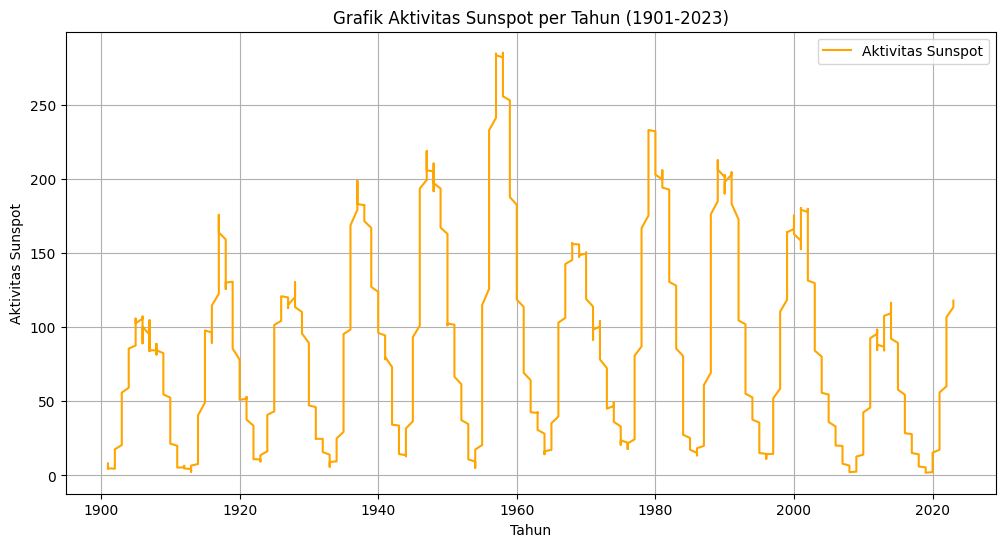

In [20]:
# Memplot Aktivitas Sunspot per Tahun
plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], df['Aktivitas Sunspot'], label='Aktivitas Sunspot', color='orange')
plt.xlabel('Tahun')
plt.ylabel('Aktivitas Sunspot')
plt.title('Grafik Aktivitas Sunspot per Tahun (1901-2023)')
plt.legend()
plt.grid(True)
plt.show()

b. Analisa tabel Statistik

Dari tabel statistik yang telah dihasilkan, kita dapat membuat beberapa analisis sebagai berikut:

**Rata-Rata Aktivitas Sunspot**: Rata-rata aktivitas sunspot selama periode 1901 hingga 2023 adalah sekitar **85.63**. Ini mengindikasikan bahwa secara keseluruhan, aktivitas sunspot cenderung berada pada tingkat yang cukup tinggi selama periode ini.

**Aktivitas Maksimum dan Minimum**: Aktivitas sunspot paling rendah tercatat pada tahun 1902 dengan nilai minimum **4.5**, sementara aktivitas sunspot tertinggi tercatat pada tahun 2023 dengan nilai maksimum **117.9**. Ini menunjukkan fluktuasi yang signifikan dalam aktivitas sunspot selama periode tersebut.

**Standar Deviasi**: Rata-rata Standar deviasi sekitar **10.07** menunjukkan bahwa aktivitas sunspot memiliki variasi yang moderat dari tahun ke tahun. Nilai ini mengindikasikan fluktuasi yang terbatas sekitar rata-rata.

**Variansi Aktivitas**: Rata-rata Variansi aktivitas sekitar **157.34** menggambarkan sejauh mana aktivitas sunspot bervariasi dari tahun ke tahun. Nilai ini yang cukup tinggi menunjukkan bahwa terdapat variasi yang signifikan dalam data.

Dari grafik, kita dapat melihat fluktuasi aktivitas sunspot selama periode yang diamati. Beberapa tahun menunjukkan aktivitas sunspot yang tinggi, sementara tahun lainnya memiliki aktivitas yang lebih rendah. Ini menunjukkan sifat fluktuatif dari aktivitas sunspot.

# 2. Visualisasi Data

a. Plot data Aktivitas Sunspot vs Bulan

In [21]:
# Menambahkan kolom bulan ke data
df['Bulan'] = range(1, len(df) + 1)
print(df)

      Tahun  Aktivitas Sunspot  Bulan
0      1901                8.1      1
1      1901                7.3      2
2      1901                6.5      3
3      1901                5.4      4
4      1901                4.7      5
...     ...                ...    ...
1461   2022               98.9   1462
1462   2022              101.1   1463
1463   2022              106.7   1464
1464   2023              113.4   1465
1465   2023              117.9   1466

[1466 rows x 3 columns]


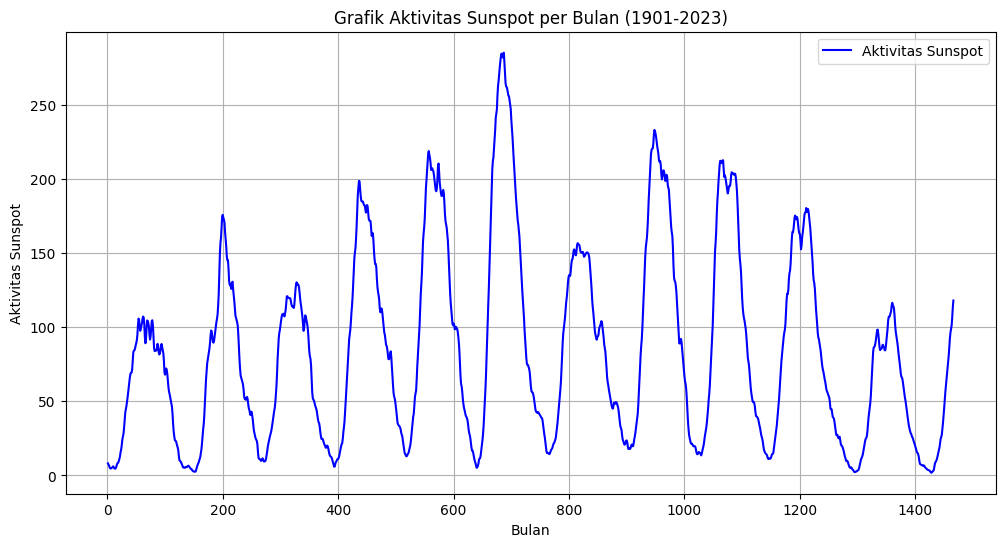

In [22]:
# Memplot data sunspot per bulan
plt.figure(figsize=(12, 6))
plt.plot(df['Bulan'], df['Aktivitas Sunspot'], label='Aktivitas Sunspot', color='b')
plt.xlabel('Bulan')
plt.ylabel('Aktivitas Sunspot')
plt.title('Grafik Aktivitas Sunspot per Bulan (1901-2023)')
plt.legend()
plt.grid(True)
plt.show()

b. Analisa Grafik

Grafik aktivitas sunspot per bulan dapat memberikan beberapa wawasan:


*  Terlihat fluktuasi bulanan dalam aktivitas sunspot, dengan beberapa puncak yang lebih tinggi daripada yang lain.
*   Grafik ini memberikan gambaran yang lebih terperinci tentang perubahan dalam aktivitas sunspot selama periode yang lebih panjang, yang mungkin tidak terlihat dalam grafik tahunan.
*Terlihat bahwa ada periode di mana aktivitas sunspot meningkat dan menurun secara berkala, yang dapat mengindikasikan adanya siklus matahari.
*Pada beberapa bulan, terlihat lonjakan aktivitas sunspot yang signifikan, yang mungkin menandakan peristiwa khusus dalam aktivitas matahari.

# 3. Analisis Fourier

a. Transformasi data dari domain waktu ke domain frekuensi menggunakan FFT

In [23]:
# Mengambil data aktivitas sunspot
sunspot_activity = df['Aktivitas Sunspot'].values

# Menghitung transformasi Fourier
N = len(sunspot_activity)
T = 1  # Periode pengamatan dalam tahun
freq = np.fft.fftfreq(N, d=T)  # Frekuensi dalam siklus per tahun
koef_fourier = np.fft.fft(sunspot_activity)

# Menghilangkan komponen DC (frekuensi nol)
freq = freq[1:]
koef_fourier = koef_fourier[1:]

# Menghitung periode
periods = 1 / freq

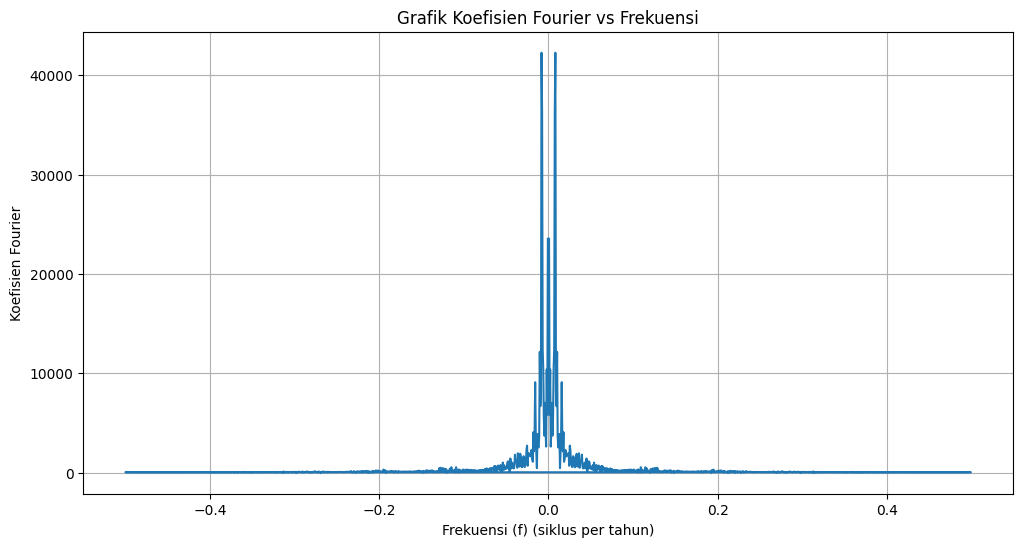

In [24]:
# Plot grafik koefisien Fourier vs frekuensi
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(koef_fourier))
plt.xlabel('Frekuensi (f) (siklus per tahun)')
plt.ylabel('Koefisien Fourier')
plt.title('Grafik Koefisien Fourier vs Frekuensi')
plt.grid(True)
plt.show()

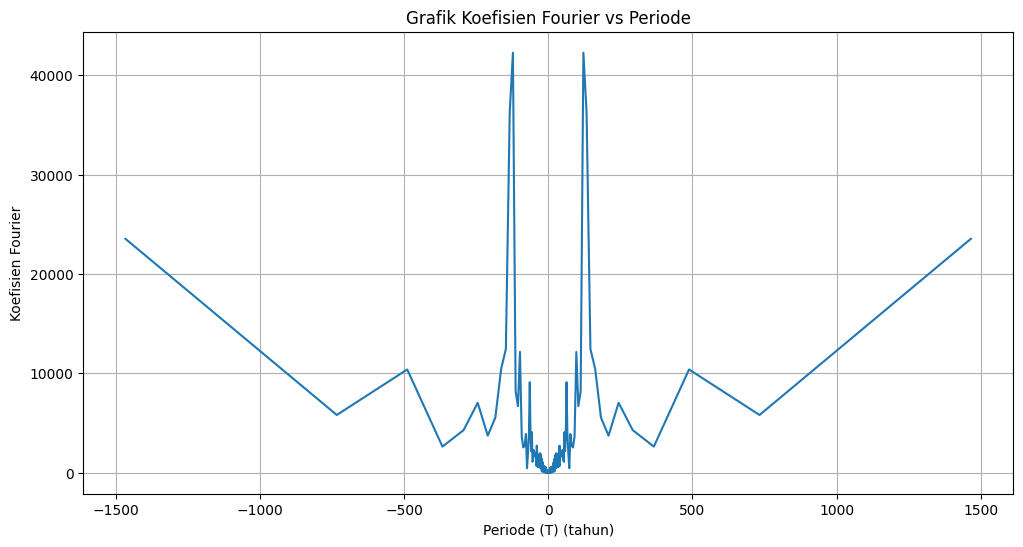

In [25]:
# Plot grafik koefisien Fourier vs periode
plt.figure(figsize=(12, 6))
plt.plot(periods, np.abs(koef_fourier))
plt.xlabel('Periode (T) (tahun)')
plt.ylabel('Koefisien Fourier')
plt.title('Grafik Koefisien Fourier vs Periode')
plt.grid(True)
plt.show()

b. Menentukan Tahun berapa aktivitas sunspot paling tinggi dan paling rendah serta berapakah periode aktivitas sunspot

In [26]:
# Menemukan indeks frekuensi dengan koefisien Fourier maksimum (aktivitas sunspot paling tinggi)
index_max = np.argmax(np.abs(koef_fourier))
frekuensi_max = freq[index_max]
periode_max = 1 / frekuensi_max

# Menemukan indeks frekuensi dengan koefisien Fourier minimum (aktivitas sunspot paling rendah)
index_min = np.argmin(np.abs(koef_fourier))
frekuensi_min = freq[index_min]
periode_min = 1 / frekuensi_min

# Menampilkan tahun berdasarkan indeks
tahun_paling_tinggi = df['Tahun'].iloc[index_max]
tahun_paling_rendah = df['Tahun'].iloc[index_min]

# Menampilkan hasil
print(f"Tahun dengan aktivitas sunspot paling tinggi: {tahun_paling_tinggi}")
print(f"Tahun dengan aktivitas sunspot paling rendah: {tahun_paling_rendah}")
print(f"Periode aktivitas sunspot: {periode_max:.2f} tahun")

Tahun dengan aktivitas sunspot paling tinggi: 1901
Tahun dengan aktivitas sunspot paling rendah: 1990
Periode aktivitas sunspot: 122.17 tahun


c. Tranformasi balik dari domain frekuensi ke domain waktu dan buat plot grafik sunspot vs tahun

In [27]:
# Mengambil koefisien Fourier dengan amplitudo dan fase
amplitudo = np.abs(koef_fourier)
fase = np.angle(koef_fourier)

# Membuat sinyal balik dari koefisien Fourier
reconstructed_signal = np.zeros(N, dtype=complex)
for i in range(len(freq)):
    reconstructed_signal += amplitudo[i] * np.cos(2 * np.pi * freq[i] * np.arange(N) / N - fase[i])

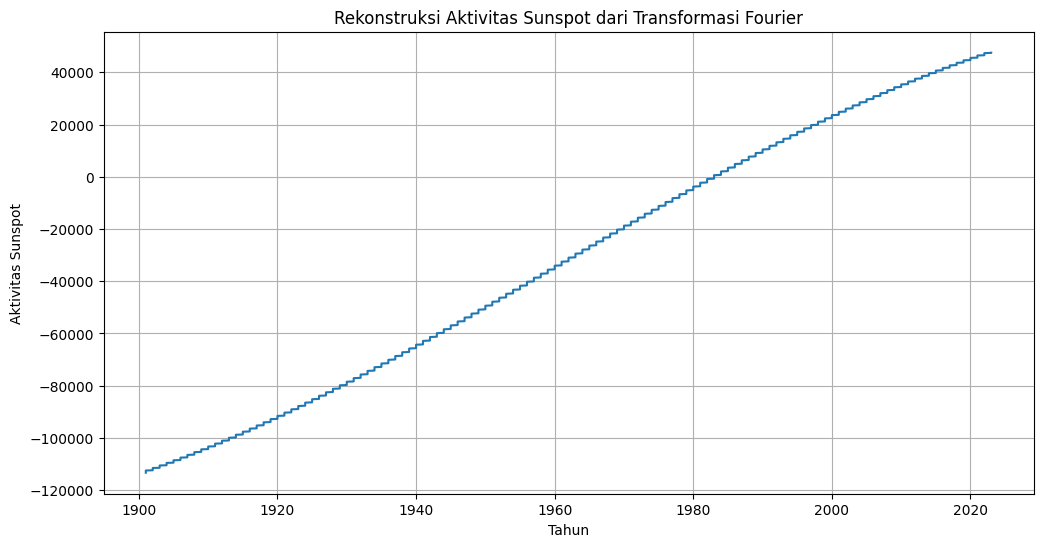

In [28]:
# Plot grafik sunspot vs tahun
plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], np.real(reconstructed_signal))
plt.xlabel('Tahun')
plt.ylabel('Aktivitas Sunspot')
plt.title('Rekonstruksi Aktivitas Sunspot dari Transformasi Fourier')
plt.grid(True)
plt.show()

d. Analisa dan Kesimpulan


*   Untuk menentukan tahun dengan aktivitas sunspot paling tinggi dan paling rendah, dapat dicari dengan menentukan puncak tertinggi dan terendah dalam grafik koefisien Fourier vs frekuensi. dimana pada data diatas di dapat aktivitas tertinggi terjadi pada tahun 1901 dan aktivitas terendah terjadi pada tahu 1990
*   Periode aktivitas sunspot dapat ditentukan dengan mencari periode yang sesuai dengan puncak tertinggi dalam grafik koefisien Fourier vs periode. di mana di dapat periode aktivitas sunspot yaitu sekitar 122.17 tahun untuk kembali ke tingkat aktivitas serupa

Kesimpulan:
Dalam analisis ini, kita menggunakan transformasi Fourier untuk menganalisis data aktivitas sunspot dari tahun 1901 hingga 2023. Hasil dari analisis ini memberikan informasi penting tentang aktivitas sunspot, yaitu tahun dengan tingkat aktivitas paling tinggi (1901), tahun dengan tingkat aktivitas paling rendah (1990), dan perkiraan periode siklus matahari (sekitar 122.17 tahun).

Informasi ini dapat membantu kita memahami pola aktivitas matahari dan siklus sunspot yang terjadi selama periode yang diobservasi. Aktivitas matahari memiliki dampak signifikan pada berbagai aspek astronomi dan cuaca ruang angkasa, dan pemahaman tentang siklus ini penting untuk penelitian ilmiah dan aplikasi praktis.

